
Aim of this part is to verfy homogenization by comparing solution obatined by homogenization and solution obtained by numerical calculation.

Two different works are presented here. One is by Desmond Lin using finite different scheme on original Equation, another by Ziang Yan using "Kirchhoff's current law" under the assumption that the composite behave in a similar way to "Resistor Network".

The work presented in this notebook is a DRAFT of later simulation.



In [80]:
# Imports
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

In [81]:
# Global Settings

# Dimension of simulation
# We assume two material exists, one with resistance 1, another decided by variable res_2
dim=71
res_2=10
centersize=int(dim/5)
num_iter=1000

grid=np.zeros((dim,dim))
center=int((dim-1)/2)
centerindex=[i-int(centersize/2) for i in range(centersize)]

In [82]:
# Functions
def coefs(i,j,res=res_2):
    '''
    # RU arrow
    if (i+j)%2==0:
        #up,left,down,right
        return (1,1,res,res)
    else:
        return (res,res,1,1)
        '''
    # LU arrow
    if (i+j)%2==0:
        #up,left,down,right
        return (1,res,res,1)
    else:
        return (res,1,1,res)

def update(i,j):
    #gives updated value of i,j point
    up=grid[i-1,j]
    left=grid[i,j-1]
    down=grid[i+1,j]
    right=grid[i,j+1]
    co=coefs(i,j)
    val=(
        up*co[1]*co[2]*co[3]
        +left*co[0]*co[2]*co[3]
        +down*co[0]*co[1]*co[3]
        +right*co[0]*co[1]*co[2]
    )/(
        co[1]*co[2]*co[3]
        +co[0]*co[2]*co[3]
        +co[0]*co[1]*co[3]
        +co[0]*co[1]*co[2]
        )

    return val
def centralize(center,centerindex,grid,strength=5):

    grid[center+centerindex[0]:center+centerindex[-1],center+centerindex[0]:center+centerindex[-1]]=strength
    return grid
'''
    # Assign Source
    for i in centerindex:
        for j in centerindex:
            grid[center+i,center+j]=strength
            '''

'\n    # Assign Source\n    for i in centerindex:\n        for j in centerindex:\n            grid[center+i,center+j]=strength\n            '

In [83]:
# Assign Source
grid=centralize(center,centerindex,grid)

In [84]:
newgrid=deepcopy(grid)
for time in range(num_iter):
    for i in range(1,dim-1):
        for j in range(1,dim-1):
            newgrid[i,j]=update(i,j)
    newgrid=centralize(center,centerindex,newgrid)
    grid=deepcopy(newgrid)


#a=[i for i in range(dim)]
#x,y=np.meshgrid(a,a)
#plt.matshow(grid, cmap=plt.cm.gray)
#plt.show()




In [85]:
x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)

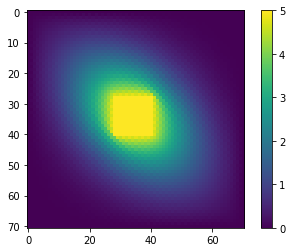

In [86]:
plt.imshow(grid)
plt.colorbar()

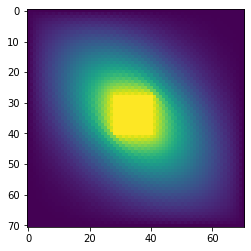

In [87]:
# To get better view scale the value by taking power of 0.1
plt.imshow(grid**0.8)

In [88]:
int(dim/2+dim/10)

42

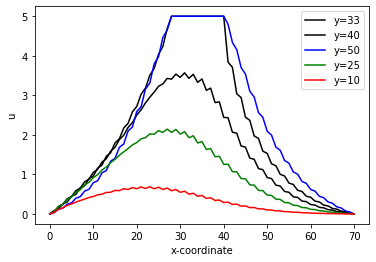

In [89]:
plt.xlabel('x-coordinate')
plt.ylabel('u')

plt.plot(grid[:,int(dim/3)],color='black',label='y=33')
plt.plot(grid[:,int(dim/2-dim/10)],color='black',label='y=40')
plt.plot(grid[:,int(dim/2)],color='blue',label='y=50')
plt.plot(grid[:,int(dim/4)],color='green',label='y=25')
plt.plot(grid[:,int(dim/10)],color='red',label='y=10')
plt.legend()

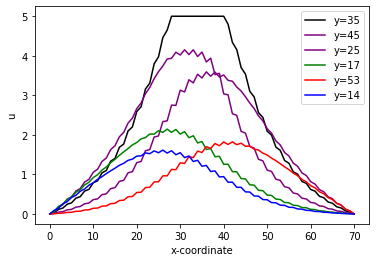

In [90]:
plt.xlabel('x-coordinate')
plt.ylabel('u')
a,b,c,d,e,f=int(dim/2),int(dim/2+10),int(dim/2-10),int(dim/4),int(3*dim/4),int(dim/5)
plt.plot(grid[:,a],color='black',label=f'y={a}')
plt.plot(grid[:,b],color='purple',label=f'y={b}')
plt.plot(grid[:,c],color='purple',label=f'y={c}')
plt.plot(grid[:,d],color='green',label=f'y={d}')
plt.plot(grid[:,e],color='red',label=f'y={e}')
plt.plot(grid[:,f],color='blue',label=f'y={f}')
plt.legend()

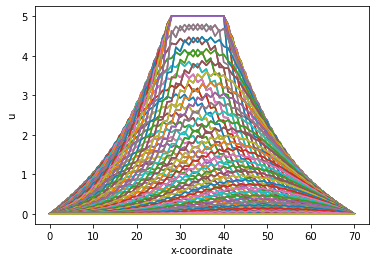

In [91]:
plt.xlabel('x-coordinate')
plt.ylabel('u')
precision=200
lx=[int(dim/precision*i) for i in range(1, precision)]
for i in lx:
    plt.plot(grid[:,i],label=f'y={i}')
#plt.legend()

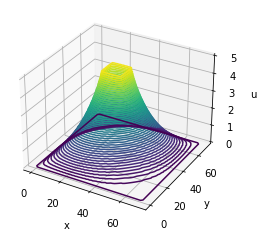

In [92]:
def f(x, y):

    return grid[int(x)][int(y)]

x = np.linspace(0, dim, dim)
y = x

X, Y = np.meshgrid(x, y)
Z = grid
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50,)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');

# Discussion on plots
The graph indicates that voltage is relatively higher on topleft-bottomright diagonal. This is due to the regular format of small lattices in microsopic structure. This indicates that the composites have relatively lower resistance on this direction. On direction of another diagobal resistance is larger. This matches(??????? still need verification by analytic solution) the results by homogenization.

# KCL
Here is a short explanation on the Mathematics used in algorithm, a version of KCL.

If we assume voltage to be $x$ at node $A_{ij}$ and $V_1,V_2,V_3,V_4$ on its adjacents with resistor between them $R_1,R_2,R_3,R_4$, we have following equation:
$$
\frac{x-V_1}{R_1}+\frac{x-V_2}{R_2}+\frac{x-V_3}{R_3}+\frac{x-V_4}{R_4}=0
$$



Rearrange to get

$$
x(R_1 R_2 R_3 +R_1 R_2 R_4+R_1 R_3 R_4+R_2 R_3 R_4)=\\
V_1(R_2 R_3 R_4)+
V_2(R_1 R_3 R_4)+
V_3(R_1 R_2 R_4)+
V_4(R_1 R_2 R_3)
$$

Hence
$$
x=\frac{V_1(R_2 R_3 R_4)+
V_2(R_1 R_3 R_4)+
V_3(R_1 R_2 R_4)+
V_4(R_1 R_2 R_3)}{(R_1 R_2 R_3 +R_1 R_2 R_4+R_1 R_3 R_4+R_2 R_3 R_4)}
$$